# Assignment 2: How good is that movie?

## Read File

In [1]:
import pandas as pd

In [50]:
non_text_features = ['release_year','runtime','budget','revenue','adult','original_language','popularity',
                        'genre_Action','genre_Adventure','genre_Animation','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
                        'genre_Fantasy','genre_History','genre_Horror','genre_Music','genre_Mystery','genre_Romance','genre_Science Fiction',
                        'genre_TV Movie','genre_Thriller','genre_War','genre_Western','product_of_Canada','product_of_France','product_of_Germany',
                        'product_of_India','product_of_Italy','product_of_Japan','product_of_Spain','product_of_UK','product_of_USA','product_of_other_countries',
                        'vote_count']


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Read the training, evaluation, and test files from CSV
train_file = pd.read_csv("TMDB_train.csv")
eva_file = pd.read_csv("TMDB_evaluate.csv")
test_file = pd.read_csv("TMDB_test.csv")

# Encoding original language using LabelEncoder
label_encoder = LabelEncoder()

# Combine the original language columns from train, evaluate, and test sets
combined = pd.concat([train_file['original_language'], eva_file['original_language'], test_file['original_language']])

# Fit the encoder with the combined data
label_encoder.fit(combined)

# Transform original language columns into encoded values
train_file['original_language'] = label_encoder.transform(train_file['original_language'])
eva_file['original_language'] = label_encoder.transform(eva_file['original_language'])
test_file['original_language'] = label_encoder.transform(test_file['original_language'])


In [4]:
# Calculate the number of null values in the 'production_companies' column
empty_production_companies = train_file['production_companies'].isnull().sum()

# Calculate the total number of production companies
total_production_companies = len(train_file)

# Get the top 5 most common production companies
top_production_companies = train_file['production_companies'].value_counts().head(5)

# Print the results
print("Total production companies count:", total_production_companies)
print("Empty production companies count:", empty_production_companies)
print("Top 5 production companies:", top_production_companies)


Total production_companies count: 100000
Empty production_companies count: 0
Top 5 production companies: production_companies
Metro-Goldwyn-Mayer      817
Warner Bros. Pictures    562
Paramount                541
Columbia Pictures        519
20th Century Fox         462
Name: count, dtype: int64


## Train Test

In [5]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def test_acc(x_train, y_train, x_test, y_test):
    # Initialize dictionaries to store test accuracies and classifiers
    plt_dict_test = dict(MNB=[], DT=[], KNN=[])
    dict_alg = dict(MNB=MultinomialNB(),DT=DecisionTreeClassifier(), KNN=KNeighborsClassifier(n_neighbors=5))
    # Iterate over each classifier
    for key, alg in dict_alg.items():
        # Train the classifier
        alg.fit(x_train, y_train)
        # Predict on test data
        alg_pred = alg.predict(x_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, alg_pred)
        # Print accuracy
        print(f"{key} Accuracy: {accuracy}")
        # Store accuracy for plotting
        plt_dict_test[key].append(accuracy*10)

    # Plot the test accuracies
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,3))
    x_labels = list(range(3))
    bar0_height = plt_dict_test['MNB']
    bar1_height = plt_dict_test['DT']
    bar2_height = plt_dict_test['KNN']

    bar1 = plt.bar(x = 0, height = bar0_height, width = 0.5, alpha = 0.4, color = 'r', label = 'MNB')  
    bar2 = plt.bar(x = 1, height = bar1_height, width = 0.5, alpha = 0.4, color = 'g', label = 'DT')  
    bar3 = plt.bar(x = 2, height = bar2_height, width = 0.5, alpha = 0.4, color = 'b', label = 'KNN')  

    plt.ylabel('Accuracy *10')
    plt.xlabel('Order')
    plt.title('Accuracy of Three Models')
    plt.ylim([0.0, 10])
    plt.xticks(list(range(3)))
    plt.legend() 
    plt.show()

### Non_text_features

In [40]:
# Extract non-text features for training data
X_train_without_text = train_file[non_text_features]
# Extract target variables for training data (rating and rate category)
y_train_rating = train_file['average_rate']
y_train_cate = train_file['rate_category']

# Extract non-text features for evaluation data
X_eval_without_text = eva_file[non_text_features]
# Extract target variables for evaluation data (rating and rate category)
y_eval_rating = eva_file['average_rate']
y_eval_cate = eva_file['rate_category']

# Extract non-text features for test data
X_test_without_text = test_file[non_text_features]

# Calculate mode values for filling missing values
mode_values = X_train_without_text.mode().iloc[0]

# Fill missing values in non-text features with mode values
X_train_without_text = X_train_without_text.fillna(mode_values)
X_eval_without_text = X_eval_without_text.fillna(mode_values)
X_test_without_text = X_test_without_text.fillna(mode_values)


### RandomForest with Non_text_features

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with a random state
clf = RandomForestClassifier(random_state=888)

# Train the classifier on non-text features and rating category target variable
clf.fit(X_train_without_text, y_train_cate)

# Evaluate the classifier on evaluation data and print the accuracy score
print(clf.score(X_eval_without_text, y_eval_cate))

0.67835


### Non_text_features Test

MNB Accuracy: 0.1172
DT Accuracy: 0.55585
KNN Accuracy: 0.32565


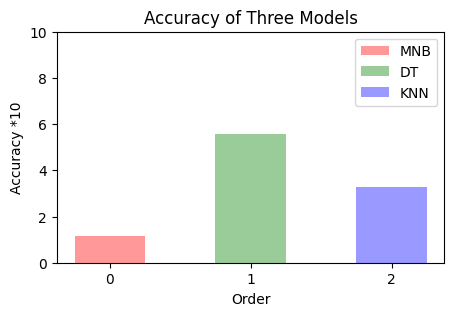

In [22]:
# Test the accuracies of classifiers using non-text features and rating category
test_acc(X_train_without_text, y_train_cate, X_eval_without_text, y_eval_cate)

### BOW with production_companies

In [7]:
import scipy
# Load Bag-of-Words representations of production companies for training and evaluation data
X_train_production_companies_BOW = scipy.sparse.load_npz('TMDB_text_features_bow/train_production_companies_bow.npz')
X_eval_production_companies_BOW = scipy.sparse.load_npz('TMDB_text_features_bow/eval_production_companies_bow.npz')

### BOW Test

MNB Accuracy: 0.2937
DT Accuracy: 0.3894
KNN Accuracy: 0.2934


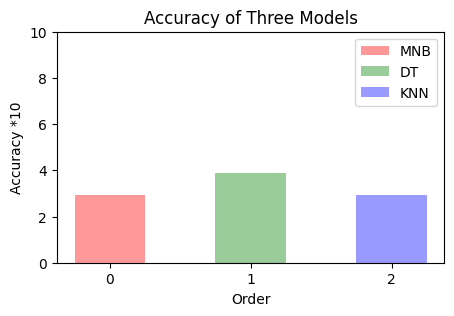

In [24]:
test_acc(X_train_production_companies_BOW, y_train_cate, X_eval_production_companies_BOW, y_eval_cate)

### BOW with concat

In [8]:
X_train_concat_BOW = scipy.sparse.load_npz('TMDB_text_features_bow/train_concat_bow.npz')
X_eval_concat_BOW = scipy.sparse.load_npz('TMDB_text_features_bow/eval_concat_bow.npz')

MNB Accuracy: 0.27645
DT Accuracy: 0.62025
KNN Accuracy: 0.34355


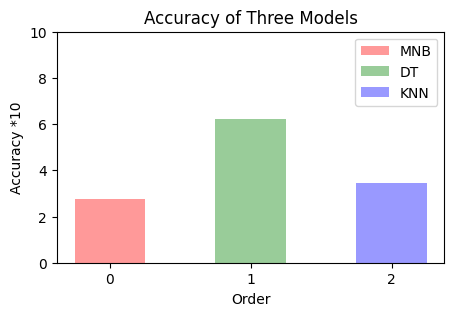

In [26]:
test_acc(X_train_concat_BOW, y_train_cate, X_eval_concat_BOW, y_eval_cate)

### TFIDF with production_companies

In [46]:
X_train_production_companies_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/train_production_companies_tfidf.npz')
X_eval_production_companies_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/eval_production_companies_tfidf.npz')

### RF with production_companies TFIDF

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=888)
clf.fit(X_train_production_companies_TFIDF, y_train_cate)
print(clf.score(X_eval_production_companies_TFIDF, y_eval_cate))

0.3973


### RF with concat TFIDF

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=888,class_weight='balanced')
clf.fit(X_train_concat_TFIDF, y_train_cate)
print(clf.score(X_eval_concat_TFIDF, y_eval_cate))

0.6455


### TFIDF Test

MNB Accuracy: 0.3023
DT Accuracy: 0.39215
KNN Accuracy: 0.30345


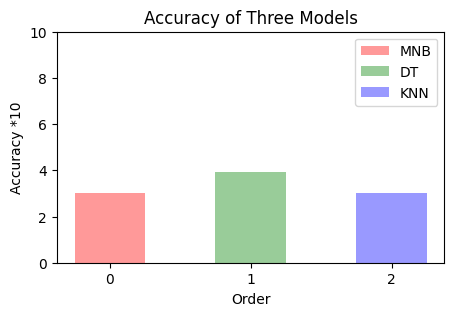

In [28]:
test_acc(X_train_production_companies_TFIDF, y_train_cate, X_eval_production_companies_TFIDF, y_eval_cate)

### TFIDF with concat

In [10]:
X_train_concat_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/train_concat_tfidf.npz')
X_eval_concat_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/eval_concat_tfidf.npz')

MNB Accuracy: 0.2959
DT Accuracy: 0.61795
KNN Accuracy: 0.35675


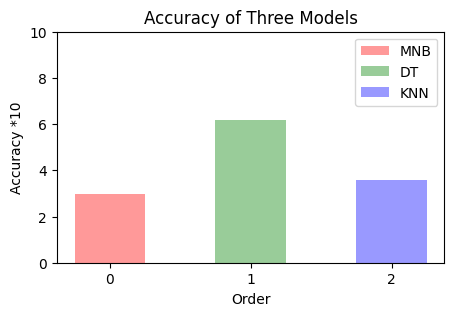

In [30]:
test_acc(X_train_concat_TFIDF, y_train_cate, X_eval_concat_TFIDF, y_eval_cate)

### Evaluation

In [12]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

MNB_cls = MultinomialNB(alpha=0.1)
MNB_cls.fit(X_train_production_companies_TFIDF, y_train_cate)
y_pred_eval = MNB_cls.predict(X_eval_production_companies_TFIDF)
# Print classification report
print("TFIDF MultinomialNB")
print(classification_report(y_eval_cate, y_pred_eval))

TFIDF MultinomialNB
              precision    recall  f1-score   support

           0       0.34      0.09      0.14      2184
           1       0.32      0.06      0.10      2829
           2       0.29      0.45      0.35      5119
           3       0.31      0.54      0.39      5420
           4       0.30      0.06      0.10      2791
           5       0.31      0.17      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.31      0.23      0.22     20000
weighted avg       0.31      0.30      0.26     20000



In [13]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

MNB_cls = MultinomialNB(alpha=0.1)
MNB_cls.fit(X_train_production_companies_BOW, y_train_cate)
y_pred_eval = MNB_cls.predict(X_eval_production_companies_BOW)
# Print classification report
print("BOW MultinomialNB")
print(classification_report(y_eval_cate, y_pred_eval))

BOW MultinomialNB
              precision    recall  f1-score   support

           0       0.27      0.13      0.18      2184
           1       0.28      0.09      0.14      2829
           2       0.29      0.38      0.33      5119
           3       0.30      0.51      0.38      5420
           4       0.28      0.08      0.13      2791
           5       0.27      0.24      0.25      1657

    accuracy                           0.29     20000
   macro avg       0.28      0.24      0.23     20000
weighted avg       0.29      0.29      0.26     20000



In [14]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

DT_cls = DecisionTreeClassifier()
DT_cls.fit(X_train_production_companies_TFIDF, y_train_cate)
y_pred_eval = DT_cls.predict(X_eval_production_companies_TFIDF)
# Print classification report
print("TFIDF DecisionTree")
print(classification_report(y_eval_cate, y_pred_eval))

TFIDF DecisionTree
              precision    recall  f1-score   support

           0       0.39      0.25      0.30      2184
           1       0.43      0.24      0.31      2829
           2       0.36      0.53      0.43      5119
           3       0.39      0.53      0.45      5420
           4       0.48      0.23      0.31      2791
           5       0.43      0.23      0.30      1657

    accuracy                           0.39     20000
   macro avg       0.41      0.33      0.35     20000
weighted avg       0.41      0.39      0.38     20000



In [15]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

DT_cls = DecisionTreeClassifier()
DT_cls.fit(X_train_production_companies_BOW, y_train_cate)
y_pred_eval = DT_cls.predict(X_eval_production_companies_BOW)
# Print classification report
print("BOW DecisionTree")
print(classification_report(y_eval_cate, y_pred_eval))

BOW DecisionTree
              precision    recall  f1-score   support

           0       0.39      0.25      0.30      2184
           1       0.42      0.24      0.31      2829
           2       0.37      0.51      0.43      5119
           3       0.39      0.54      0.45      5420
           4       0.48      0.23      0.31      2791
           5       0.42      0.24      0.30      1657

    accuracy                           0.39     20000
   macro avg       0.41      0.33      0.35     20000
weighted avg       0.40      0.39      0.38     20000



### Baseline

In [16]:
from sklearn.dummy import DummyClassifier

#### Random Baseline

In [17]:
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier

# Initialize a Dummy Classifier with strategy "uniform" (random guessing)
RANDOMclf = DummyClassifier(strategy="uniform")

# Train the Dummy Classifier on TF-IDF representations of production companies for training data
RANDOMclf.fit(X_train_production_companies_TFIDF, y_train_cate)

# Predict rating categories for evaluation data
y_pred_eval = RANDOMclf.predict(X_eval_production_companies_TFIDF)

# Print classification report
print("Random baseline")
print(classification_report(y_eval_cate, y_pred_eval))

# Calculate and print the average accuracy of the random baseline over 10 iterations
random_scores = []
for _ in range(10):
    RANDOMclf.fit(X_train_production_companies_TFIDF, y_train_cate)
    random_scores.append(RANDOMclf.score(X_eval_production_companies_TFIDF, y_eval_cate))
print("Random baseline accuracy", sum(random_scores) / 10.)


Random baseline
              precision    recall  f1-score   support

           0       0.11      0.18      0.14      2184
           1       0.15      0.18      0.16      2829
           2       0.25      0.16      0.19      5119
           3       0.28      0.18      0.22      5420
           4       0.14      0.17      0.16      2791
           5       0.09      0.17      0.11      1657

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.16     20000
weighted avg       0.20      0.17      0.18     20000

Random baseline accuracy 0.16594


### Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#### Select 2,5,10,15,20 Features

With 2 Features
Selected Features: Index(['budget', 'revenue'], dtype='object')
MNB Accuracy: 0.24695
DT Accuracy: 0.2959
KNN Accuracy: 0.17415


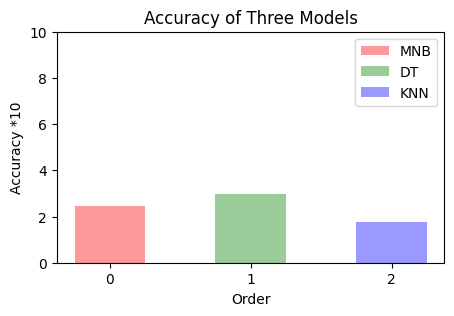


With 5 Features
Selected Features: Index(['runtime', 'budget', 'revenue', 'popularity', 'vote_count'], dtype='object')
MNB Accuracy: 0.11715
DT Accuracy: 0.5639
KNN Accuracy: 0.3699


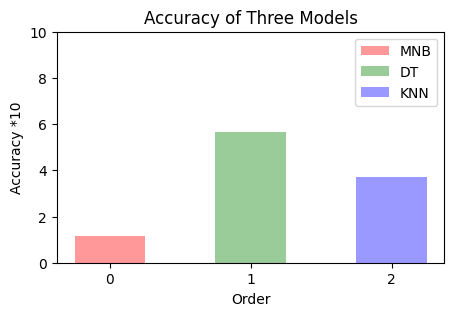


With 10 Features
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult',
       'original_language', 'popularity', 'genre_Documentary', 'genre_Horror',
       'vote_count'],
      dtype='object')
MNB Accuracy: 0.1172
DT Accuracy: 0.42185
KNN Accuracy: 0.32075


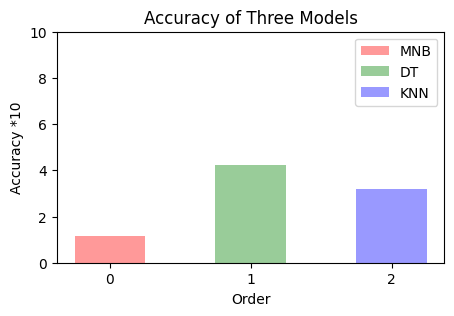


With 15 Features
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult',
       'original_language', 'popularity', 'genre_Animation', 'genre_Comedy',
       'genre_Documentary', 'genre_Drama', 'genre_Horror', 'genre_Music',
       'genre_Thriller', 'vote_count'],
      dtype='object')
MNB Accuracy: 0.1172
DT Accuracy: 0.4644
KNN Accuracy: 0.32295


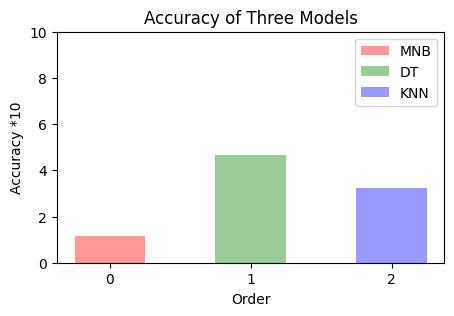


With 20 Features
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult',
       'original_language', 'popularity', 'genre_Animation', 'genre_Comedy',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Romance', 'genre_Thriller',
       'genre_Western', 'product_of_other_countries', 'vote_count'],
      dtype='object')
MNB Accuracy: 0.1172
DT Accuracy: 0.4824
KNN Accuracy: 0.32325


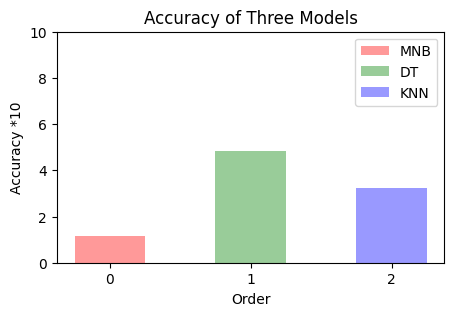

In [37]:
list1 = [2, 5, 10, 15, 20]

# Iterate over different numbers of selected features
for i in list1:
    # Initialize SelectKBest with chi-squared scoring function and current value of k
    selecter = SelectKBest(score_func=chi2, k=i)
    
    # Transform training data to select the top k features
    X_new_train = selecter.fit_transform(X_train_without_text, y_train_cate)
    # Get indices of selected features
    integer_columns = selecter.get_support(indices=True)
    # Transform evaluation data using the same selection
    X_new_test = selecter.transform(X_eval_without_text)
    
    # Print the number of selected features
    print("With " + str(i) + " Features")
    # Print the names of selected features
    print("Selected Features:", X_train_without_text.columns[integer_columns])
    # Test and visualize the accuracies of classifiers using selected features
    test_acc(X_new_train, y_train_cate, X_new_test, y_eval_cate)
    print("")


### BOW Self training

In [20]:
unlabel_data_production_companies_BOW = scipy.sparse.load_npz('TMDB_text_features_bow/unlabelled_production_companies_bow.npz')
from scipy.sparse import vstack
from sklearn.semi_supervised import SelfTrainingClassifier
# Stack the training and unlabelled data
all_used_data = vstack([X_train_production_companies_BOW, unlabel_data_production_companies_BOW])
# Create labels for all data points (labelled data with actual labels, unlabelled data with -1)
all_used_label = y_train_cate.to_list() + [-1] * (unlabel_data_production_companies_BOW.shape[0])

#### Decision Tree Classifiers

In [21]:
# Initialize Decision Tree classifier
DTclf = DecisionTreeClassifier(random_state=666)

# Initialize Self-Training classifier with Decision Tree as base estimator
self_training_DT_model = SelfTrainingClassifier(DTclf, criterion='k_best', k_best=100)

# Train Self-Training classifier on all used data (labelled and unlabelled)
self_training_DT_model.fit(all_used_data, all_used_label)

# Predict rating categories for evaluation data
DT_valid_pred = self_training_DT_model.predict(X_eval_production_companies_BOW)

# Print classification report
print("Self Training with DTclf")
print(classification_report(y_eval_cate, DT_valid_pred))

Self Training with DTclf
              precision    recall  f1-score   support

           0       0.39      0.25      0.30      2184
           1       0.42      0.24      0.31      2829
           2       0.37      0.51      0.43      5119
           3       0.39      0.54      0.45      5420
           4       0.48      0.23      0.31      2791
           5       0.42      0.24      0.30      1657

    accuracy                           0.39     20000
   macro avg       0.41      0.33      0.35     20000
weighted avg       0.40      0.39      0.38     20000



#### MultinomialNB

In [40]:
MNBclf = MultinomialNB()
self_training_MNB_model = SelfTrainingClassifier(MNBclf, criterion='k_best', k_best=100)
self_training_MNB_model.fit(all_used_data, all_used_label)
MNB_valid_pred = self_training_MNB_model.predict(X_eval_production_companies_BOW)
print("Self Training with MNBclf")
print(classification_report(y_eval_cate, MNB_valid_pred))

Self Training with MNBclf
              precision    recall  f1-score   support

           0       0.27      0.13      0.17      2184
           1       0.27      0.09      0.14      2829
           2       0.29      0.38      0.33      5119
           3       0.30      0.50      0.37      5420
           4       0.27      0.09      0.13      2791
           5       0.27      0.23      0.25      1657

    accuracy                           0.29     20000
   macro avg       0.28      0.24      0.23     20000
weighted avg       0.28      0.29      0.26     20000



### TFIDF Self training

In [44]:
unlabel_data_production_companies_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/unlabelled_production_companies_tfidf.npz')
from scipy.sparse import vstack
from sklearn.semi_supervised import SelfTrainingClassifier
all_used_data = vstack([X_train_production_companies_TFIDF, unlabel_data_production_companies_TFIDF])
all_used_label = y_train_cate.to_list() + [-1] * (unlabel_data_production_companies_TFIDF.shape[0])

#### Decision Tree Classifiers

In [43]:
DTclf = DecisionTreeClassifier(random_state=666)
self_training_DT_model = SelfTrainingClassifier(DTclf, criterion='k_best', k_best=100)
self_training_DT_model.fit(all_used_data, all_used_label)
DT_valid_pred = self_training_DT_model.predict(X_eval_production_companies_TFIDF)
print("Self Training with DTclf")
print(classification_report(y_eval_cate, DT_valid_pred))

Self Training with DTclf
              precision    recall  f1-score   support

           0       0.40      0.24      0.30      2184
           1       0.43      0.24      0.31      2829
           2       0.36      0.53      0.43      5119
           3       0.39      0.53      0.45      5420
           4       0.49      0.23      0.32      2791
           5       0.42      0.23      0.30      1657

    accuracy                           0.39     20000
   macro avg       0.42      0.34      0.35     20000
weighted avg       0.41      0.39      0.38     20000



#### MultinomialNB

In [44]:
MNBclf = MultinomialNB()
self_training_MNB_model = SelfTrainingClassifier(MNBclf, criterion='k_best', k_best=100)
self_training_MNB_model.fit(all_used_data, all_used_label)
MNB_valid_pred = self_training_MNB_model.predict(X_eval_production_companies_TFIDF)
print("Self Training with MNBclf")
print(classification_report(y_eval_cate, MNB_valid_pred))

Self Training with MNBclf
              precision    recall  f1-score   support

           0       0.35      0.09      0.14      2184
           1       0.33      0.05      0.09      2829
           2       0.29      0.46      0.35      5119
           3       0.31      0.54      0.40      5420
           4       0.30      0.05      0.09      2791
           5       0.33      0.17      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.32      0.23      0.22     20000
weighted avg       0.31      0.30      0.26     20000



## Kaggle

In [ ]:
# Load TF-IDF representations of concatenated text features for test data
X_test_concat_TFIDF = scipy.sparse.load_npz('TMDB_text_features_tfidf/test_concat_tfidf.npz')
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier with a random state
clf = RandomForestClassifier(random_state=888)
# Train the classifier on TF-IDF representations of concatenated text features for training data
clf.fit(X_train_concat_TFIDF, y_train_cate)
# Predict rating categories for test data
y_pred_test = clf.predict(X_test_concat_TFIDF)
# Add predicted rating categories to test file
test_file["rate_category"] = y_pred_test
# Extract columns "id" and "rate_category" for output
test_out = test_file[["id", "rate_category"]]
# Save predictions to CSV file
test_out.to_csv('test_predictions.csv', index=False)

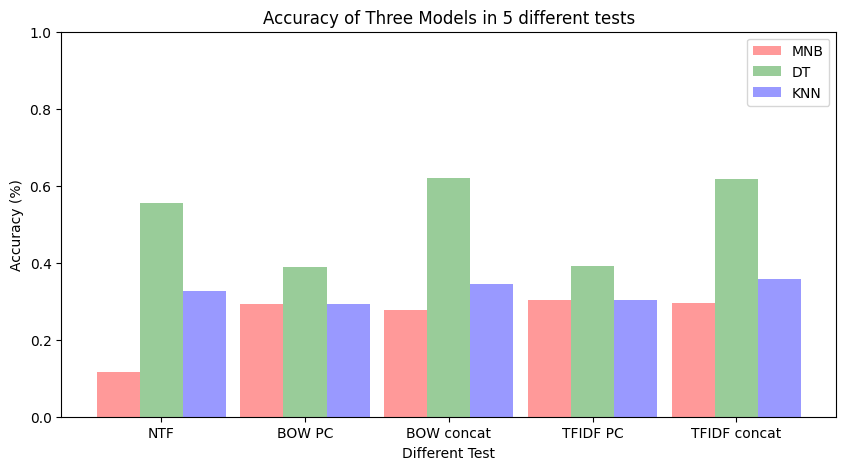

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
x_labels = ['NTF', 'BOW PC', 'BOW concat', 'TFIDF PC', 'TFIDF concat']

bar_MNB_height = [0.1172, 0.2937, 0.27645, 0.3023, 0.2959]
bar_DT_height = [0.55585, 0.3894, 0.62025, 0.39215, 0.61795]
bar_KNN_height = [0.32565, 0.2934, 0.34355, 0.30345, 0.35675]

bar1 = plt.bar(x = [i - 0.3 for i in range(5)], height = bar_MNB_height, width = 0.3, alpha = 0.4, color = 'r', label = 'MNB')  
bar2 = plt.bar(x = [i for i in range(5)], height = bar_DT_height, width = 0.3, alpha = 0.4, color = 'g', label = 'DT')  
bar3 = plt.bar(x = [i + 0.3 for i in range(5)], height = bar_KNN_height, width = 0.3, alpha = 0.4, color = 'b', label = 'KNN')  

plt.ylabel('Accuracy (%)')
plt.xlabel('Different Test')

plt.title('Accuracy of Three Models in 5 different tests')
plt.ylim([0.0, 1.0])
plt.xticks([i for i in range(5)], x_labels)
plt.legend() 
plt.show()

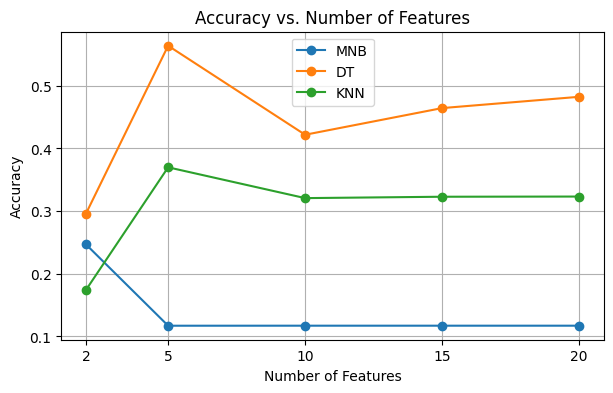

In [4]:
import matplotlib.pyplot as plt

feature_counts = [2, 5, 10, 15, 20]


mnb_accuracies = [0.24695, 0.11715, 0.1172, 0.1172, 0.1172]
dt_accuracies = [0.2959, 0.5639, 0.42185, 0.4644, 0.4824]
knn_accuracies = [0.17415, 0.3699, 0.32075, 0.32295, 0.32325]

plt.figure(figsize=(7, 4))

plt.plot(feature_counts, mnb_accuracies, marker='o', label='MNB')
plt.plot(feature_counts, dt_accuracies, marker='o', label='DT')
plt.plot(feature_counts, knn_accuracies, marker='o', label='KNN')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.xticks(feature_counts)
plt.grid(True)
plt.legend()
plt.show()